<a href="https://colab.research.google.com/github/Hildafibrianti/Hate-Speech-Detection/blob/master/Hate_Speech_Detection_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Mining**

Text mining is the process of exploring and analyzing large amounts of unstructured text data aided by software that can identify concepts, patterns, topics, keywords, and other attributes in the data.

Before we start, we will load some libraries that we will be use.

In [117]:
import pandas as pd
from nltk.corpus import stopwords
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
!pip install textstat
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
%matplotlib inline

**Import Raw Data**

The data that i use IDHSD_RIO_unbalanced_713_2017.txt from (https://github.com/ialfina/id-hatespeech-detection). Here the data from local file upload into Google Colaboratory.

In [118]:
from google.colab import files
files.upload()

Saving IDHSD_RIO_unbalanced_713_2017.txt to IDHSD_RIO_unbalanced_713_2017 (3).txt


{'IDHSD_RIO_unbalanced_713_2017.txt': b'Label\tTweet\rNon_HS\tRT @spardaxyz: Fadli Zon Minta Mendagri Segera Menonaktifkan Ahok Jadi Gubernur DKI https:\\/\\/t.co\\/KH5vIRwPdO\rNon_HS\tRT @baguscondromowo: Mereka terus melukai aksi dalam rangka memenjarakan Ahok atau Ahok gagal dalam Pilkada.\rNon_HS\tSylvi: bagaimana gurbernur melakukan kekerasan perempuan? Buktinya banyak ibu2 mau foto bareng #DebatFinalPilkadaJKT\rNon_HS\t"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Jalan di Bekasi Belum Sempat Terungkap https:\\/\\/t.co\\/m3HopPLUID\\u2026"\rNon_HS\tRT @lisdaulay28: Waspada KTP palsu.....kawal PILKADA https:\\/\\/t.co\\/OOoERQV4SM\rNon_HS\t"@felixsiauw masih bnyak hal agamis yg bisa dibahas, kenapa ke pilkada terus, apa tingkat keimanan anda cuma sebatas pilkada????"\rNon_HS\t@saidaqil apa maksud pernyataan. Anda? Apa anda mengaminkan kriminalisasi Ahok?? Hati2 jg dg mulutmu pak! https:\\/\\/t.co\\/H4ODVaY0Md\rNon_HS\tAhok Akan Integrasikan Transportasi Publik dengan Sistem Single 

In [119]:
Df = pd.read_csv("IDHSD_RIO_unbalanced_713_2017.txt",sep="\t")
Df

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,HS,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,HS,"Betul bang hancurkan merka bang, musnahkan chi..."
710,HS,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,HS,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


Replace "Label" attribute as shown below.
> 
HS     -> 1 ; Non-HS -> 0



In [120]:
# Import Module
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Replace Categotical Data with Encoded Data
Df['Label'].replace('HS',1, inplace=True)
Df['Label'].replace('Non_HS',0, inplace=True)

df_encoded= pd.concat([Df], axis=1)

# Show Encoded Dataframe
df_encoded

,Label,Tweet
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,0,RT @baguscondromowo: Mereka terus melukai aksi...
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...
...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....
709,1,"Betul bang hancurkan merka bang, musnahkan chi..."
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo..."
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar..."


In [121]:
count = Df['Label'].value_counts()
print(count)

0    453
1    260
Name: Label, dtype: int64


From the output as shown above we can see that the number of hate speech tweets is 260 and the number of Non-Hate Speech is 453.

In [122]:
# Adding text-length as a field in the dataset
Df['text length'] = Df['Tweet'].apply(len)
print(Df.head())

   Label                                              Tweet  text length
0      0  RT @spardaxyz: Fadli Zon Minta Mendagri Segera...          110
1      0  RT @baguscondromowo: Mereka terus melukai aksi...          108
2      0  Sylvi: bagaimana gurbernur melakukan kekerasan...          116
3      0  Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...          115
4      0  RT @lisdaulay28: Waspada KTP palsu.....kawal P...           79


**Check Missing Values**

Before processing the data, make sure that there are no missing values ​​in the dataset.

In [123]:
Df.isnull().sum()

Label          0
Tweet          0
text length    0
dtype: int64

In [124]:
#Finding words with # attached to it
Df['#'] = Df['Tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
Df

,Label,Tweet,text length,#
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,#DebatFinalPilkadaJKT
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,
...,...,...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,62,
709,1,"Betul bang hancurkan merka bang, musnahkan chi...",107,
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...",139,
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...",137,


Column showing whether the corresponding tweet has a hash tagged word or not

In [125]:
frame = Df['#']
frame = pd.DataFrame(frame)
frame = frame.rename({'#':'Count(#)'},axis = 'columns')
frame[frame['Count(#)'] == ''] = 'No hashtags'

data_frame = pd.concat([Df,frame],axis = 1)
data_frame.drop('#',axis = 1,inplace = True)
data_frame.head(10)

data_frame = data_frame.rename({'Count(#)':'Hash words'},axis = 'columns')
data_frame

,Label,Tweet,text length,Hash words
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,No hashtags
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,No hashtags
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,#DebatFinalPilkadaJKT
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,No hashtags
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,No hashtags
...,...,...,...,...
708,1,Muka Si BABi Ahok Tuh Yg Mirip SERBET Lantai.....,62,No hashtags
709,1,"Betul bang hancurkan merka bang, musnahkan chi...",107,No hashtags
710,1,"Sapa Yg bilang Ahok anti korupsi!?, klo grombo...",139,No hashtags
711,1,"Gw juga ngimpi SENTILIN BIJI BABI AHOK, pcetar...",137,No hashtags


In [126]:
# collecting only the tweets from the txt file into a variable name tweet
tweet=Df.Tweet

In [127]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Text Cleaning**

We will remove exstra spaces, @username, links, punctuations and numbers, whitespace with a single space, leading and trailing whitespace and removal capitalization.

In [128]:
import re

def preprocess(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")

    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')

    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')

    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')

    # removal of capitalization
    tweet_lower = newtweet.str.lower()

    New_tweet = tweet_lower.apply(lambda x: x.split())
    
    for i in range(len(New_tweet)):
        New_tweet[i] = ' '.join(New_tweet[i])
        tweets_p= New_tweet
    
    return tweets_p

processed_tweets = preprocess(tweet)

Df['processed_tweets'] = processed_tweets
print(Df[["Tweet","processed_tweets"]].head(10))

                                               Tweet                                   processed_tweets
0  RT @spardaxyz: Fadli Zon Minta Mendagri Segera...  rt fadli zon minta mendagri segera menonaktifk...
1  RT @baguscondromowo: Mereka terus melukai aksi...  rt mereka terus melukai aksi dalam rangka meme...
2  Sylvi: bagaimana gurbernur melakukan kekerasan...  sylvi bagaimana gurbernur melakukan kekerasan ...
3  Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...  ahmad dhani tak puas debat pilkada masalah jal...
4  RT @lisdaulay28: Waspada KTP palsu.....kawal P...  rt waspada ktp palsu kawal pilkada https t co ...
5  @felixsiauw masih bnyak hal agamis yg bisa dib...  masih bnyak hal agamis yg bisa dibahas kenapa ...
6  @saidaqil apa maksud pernyataan. Anda? Apa and...  apa maksud pernyataan anda apa anda mengaminka...
7  Ahok Akan Integrasikan Transportasi Publik den...  ahok akan integrasikan transportasi publik den...
8  Ahok mampu melawan korupsi di ibukota, bangun ...  ahok mampu

**Tokenization**

In [129]:
from nltk.tokenize import RegexpTokenizer

def tokenizeWords(s, remove_punctuation=True):
    if remove_punctuation == True:
        tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
        clean_words = tokenizer.tokenize(s)
    else:
        clean_words = nltk.word_tokenize(s)
    return clean_words

Df['tweet_token'] = Df['processed_tweets'].apply(tokenizeWords)
Df.head()

,Label,Tweet,text length,#,processed_tweets,tweet_token
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,,rt fadli zon minta mendagri segera menonaktifk...,"[rt, fadli, zon, minta, mendagri, segera, meno..."
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,,rt mereka terus melukai aksi dalam rangka meme...,"[rt, mereka, terus, melukai, aksi, dalam, rang..."
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,#DebatFinalPilkadaJKT,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker..."
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,,rt waspada ktp palsu kawal pilkada https t co ...,"[rt, waspada, ktp, palsu, kawal, pilkada, http..."


**Stemming**

In [130]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()
Df['tweet_stem'] = Df['tweet_token'].apply(lambda x: [stemmer.stem(y) for y in x])
Df.head()

,Label,Tweet,text length,#,processed_tweets,tweet_token,tweet_stem
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,,rt fadli zon minta mendagri segera menonaktifk...,"[rt, fadli, zon, minta, mendagri, segera, meno...","[rt, fadli, zon, minta, mendagri, segera, nona..."
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,,rt mereka terus melukai aksi dalam rangka meme...,"[rt, mereka, terus, melukai, aksi, dalam, rang...","[rt, mereka, terus, luka, aksi, dalam, rangka,..."
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,#DebatFinalPilkadaJKT,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per..."
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tak, puas, debat, pilkada, masa..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,,rt waspada ktp palsu kawal pilkada https t co ...,"[rt, waspada, ktp, palsu, kawal, pilkada, http...","[rt, waspada, ktp, palsu, kawal, pilkada, http..."


**Removing stopwords**

In [131]:
stopwords = nltk.corpus.stopwords.words("indonesian")

#Extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ['rt','dalam','atau','di','yg','ke','terus','apa','jg','dg','dengan','dan','gak','ga','aku','kamu','noh','aja','pdh','kan','deh','para','jadi','nya','dong','lho']
stopwords.extend(other_exclusions)

#Removing stopwords
Df['tweet_stop'] = Df['tweet_stem'].apply(lambda x: [item for item in x if item not in stopwords])
Df.head()


,Label,Tweet,text length,#,processed_tweets,tweet_token,tweet_stem,tweet_stop
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,,rt fadli zon minta mendagri segera menonaktifk...,"[rt, fadli, zon, minta, mendagri, segera, meno...","[rt, fadli, zon, minta, mendagri, segera, nona...","[fadli, zon, mendagri, nonaktif, ahok, gubernu..."
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,,rt mereka terus melukai aksi dalam rangka meme...,"[rt, mereka, terus, melukai, aksi, dalam, rang...","[rt, mereka, terus, luka, aksi, dalam, rangka,...","[luka, aksi, rangka, penjara, ahok, ahok, gaga..."
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,#DebatFinalPilkadaJKT,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk..."
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, puas, debat, pilkada, jalan, be..."
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,,rt waspada ktp palsu kawal pilkada https t co ...,"[rt, waspada, ktp, palsu, kawal, pilkada, http...","[rt, waspada, ktp, palsu, kawal, pilkada, http...","[waspada, ktp, palsu, kawal, pilkada, https, t..."


**Lemmitization**

In [132]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
Df['tweet_lemma'] = Df['tweet_stop'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x]))
Df.head()

,Label,Tweet,text length,#,processed_tweets,tweet_token,tweet_stem,tweet_stop,tweet_lemma
0,0,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...,110,,rt fadli zon minta mendagri segera menonaktifk...,"[rt, fadli, zon, minta, mendagri, segera, meno...","[rt, fadli, zon, minta, mendagri, segera, nona...","[fadli, zon, mendagri, nonaktif, ahok, gubernu...",fadli zon mendagri nonaktif ahok gubernur dki ...
1,0,RT @baguscondromowo: Mereka terus melukai aksi...,108,,rt mereka terus melukai aksi dalam rangka meme...,"[rt, mereka, terus, melukai, aksi, dalam, rang...","[rt, mereka, terus, luka, aksi, dalam, rangka,...","[luka, aksi, rangka, penjara, ahok, ahok, gaga...",luka aksi rangka penjara ahok ahok gagal pilkada
2,0,Sylvi: bagaimana gurbernur melakukan kekerasan...,116,#DebatFinalPilkadaJKT,sylvi bagaimana gurbernur melakukan kekerasan ...,"[sylvi, bagaimana, gurbernur, melakukan, keker...","[sylvi, bagaimana, gurbernur, laku, keras, per...","[sylvi, gurbernur, laku, keras, perempuan, buk...",sylvi gurbernur laku kera perempuan bukti foto...
3,0,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja...",115,,ahmad dhani tak puas debat pilkada masalah jal...,"[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, tak, puas, debat, pilkada, masa...","[ahmad, dhani, puas, debat, pilkada, jalan, be...",ahmad dhani puas debat pilkada jalan bekas htt...
4,0,RT @lisdaulay28: Waspada KTP palsu.....kawal P...,79,,rt waspada ktp palsu kawal pilkada https t co ...,"[rt, waspada, ktp, palsu, kawal, pilkada, http...","[rt, waspada, ktp, palsu, kawal, pilkada, http...","[waspada, ktp, palsu, kawal, pilkada, https, t...",waspada ktp palsu kawal pilkada http t co oooe...


**Visualizations**

Visualizing which of the word is most commonly used in the twitter dataset.

Normal words


(-0.5, 799.5, 499.5, -0.5)

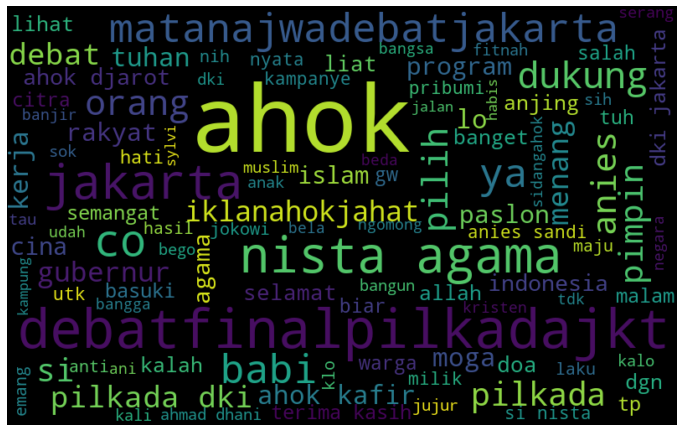

In [133]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

value_list = Df['tweet_lemma']
values = ','.join(str(v) for v in value_list)
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(values)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [134]:
#Collecting hashtags

hash_positive = []
hash_negative = []

In [135]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [136]:
hash_positive = hashtag_extract(Df['Tweet'][Df['Label'] == 0])

# extracting hashtags from racist/sexist tweets
hash_negative = hashtag_extract(Df['Tweet'][Df['Label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

In [137]:
from collections import Counter

q = Counter(hash_positive)
q = dict(q.most_common())

In [138]:
l_positive_count = list(q.values())
l_positive_count[0:4]

[76, 39, 9, 8]

In [139]:
l_positive_values = list(q.keys())
l_positive_values[0:4]

['DebatFinalPilkadaJKT',
 'MataNajwaDebatJakarta',
 'IklanAhokJahat',
 'SidangAhok']

In [140]:
r = Counter(hash_negative)
r = dict(r.most_common())

In [141]:
l_negative_count = list(r.values())
l_negative_count[0:4]

[25, 15, 9, 4]

In [142]:
l_negative_values = list(r.keys())
l_negative_values[0:4]

['DebatFinalPilkadaJKT',
 'IklanAhokJahat',
 'MataNajwaDebatJakarta',
 'JakartaBanjir']

In [143]:
#Creating a dataframe to represent top 20 positive and negative hash words
l1 = pd.DataFrame(l_positive_values[0:20],columns = ['Positive_Words'])
l2 = pd.DataFrame(l_positive_count[0:20],columns = ['Positive_Count'])
l3 = pd.DataFrame(l_negative_values[0:20],columns = ['Negative_Words'])
l4 = pd.DataFrame(l_negative_count[0:20],columns = ['Negative_Count'])
z = pd.concat([l1,l2,l3,l4],axis = 1)
z

,Positive_Words,Positive_Count,Negative_Words,Negative_Count
0,DebatFinalPilkadaJKT,76,DebatFinalPilkadaJKT,25
1,MataNajwaDebatJakarta,39,IklanAhokJahat,15
2,IklanAhokJahat,9,MataNajwaDebatJakarta,9
3,SidangAhok,8,JakartaBanjir,4
4,FreeAhok,7,Nomor2Koruptor,4
5,TetapAhok,6,AhokPastiTumbang,3
6,AniesSandi,5,HaramPemimpinKafir,2
7,debatfinalpilkadadki,4,SidangAhok,2
8,DebatFinalDKI,3,iklanahokjahat,2
9,tetapahok,3,HaramPilihAhok,1


In [144]:
import plotly.express as px

#Normal histogram of positive words
fig = px.bar(z, x="Positive_Words", y="Positive_Count",
            hover_name="Positive_Words",color = 'Positive_Count')
fig.show()

In [145]:
#Normal histogram of negative words
fig = px.bar(z, x="Negative_Words", y="Negative_Count",
            hover_name="Negative_Words",color= 'Negative_Count')
fig.show()

**Feature Engineering**

In [146]:
#TF-IDF Features-F1
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(Df['tweet_lemma'] )
tfidf

<713x287 sparse matrix of type '<class 'numpy.float64'>'
	with 3886 stored elements in Compressed Sparse Row format>

**Running various model Using TFIDF without additional features**

In [147]:
X = tfidf
y = Df['Label'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        98
           1       0.88      0.78      0.82        45

    accuracy                           0.90       143
   macro avg       0.89      0.86      0.87       143
weighted avg       0.89      0.90      0.89       143

Logistic Regression, Accuracy Score: 0.8951048951048951


In [148]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        98
           1       0.78      0.78      0.78        45

    accuracy                           0.86       143
   macro avg       0.84      0.84      0.84       143
weighted avg       0.86      0.86      0.86       143

Random Forest, Accuracy Score: 0.8601398601398601


In [149]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X.toarray(), y, random_state=42, test_size=0.2)
nb=GaussianNB()
nb.fit(X_train_tfidf,y_train)
y_preds = nb.predict(X_test_tfidf)
acc2=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Naive Bayes, Accuracy Score:",acc2)

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        98
           1       0.69      0.80      0.74        45

    accuracy                           0.83       143
   macro avg       0.80      0.82      0.80       143
weighted avg       0.84      0.83      0.83       143

Naive Bayes, Accuracy Score: 0.8251748251748252


In [150]:
support =LinearSVC(random_state=20)
support.fit(X_train_tfidf,y_train)
y_preds = support.predict(X_test_tfidf)
acc3=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("SVM, Accuracy Score:" , acc3)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        98
           1       0.77      0.82      0.80        45

    accuracy                           0.87       143
   macro avg       0.84      0.85      0.85       143
weighted avg       0.87      0.87      0.87       143

SVM, Accuracy Score: 0.8671328671328671


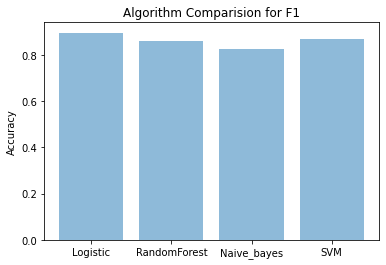

In [151]:
objects = ('Logistic', 'RandomForest', 'Naive_bayes', 'SVM')
y_pos = np.arange(len(objects))
performance = [acc,acc1,acc2,acc3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for F1')
plt.show()